## Для курсового проекта был взят датасет, содержащий уровень осадков по дням в Сиднее (Австралия) за 3 года (2014, 2015, 2016). Идея заключается в том, чтобы подтвердить или опровергнуть гипотезу о том, что в выбранном регионе дождливых дней в году больше, чем ясных. Дождливым день считается, если выпало больше 1 мм осадков.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from scipy.stats import norm

%matplotlib inline

In [2]:
data = pd.read_csv('sydney_rainy_days.csv')

df = data[['Date', 'Rainfall']].copy()

In [3]:
df

,Date,Rainfall
0,2014-01-01,0.0
1,2014-01-02,0.0
2,2014-01-03,0.2
3,2014-01-04,0.0
4,2014-01-05,0.0
...,...,...
1091,2016-12-27,0.0
1092,2016-12-28,0.0
1093,2016-12-29,0.0
1094,2016-12-30,0.0


### Проведем предварительный анализ данных.

In [4]:
df.loc[df['Rainfall'].isna()]

,Date,Rainfall
259,2014-09-17,NaN
304,2014-11-01,NaN
331,2014-11-28,NaN
332,2014-11-29,NaN


In [5]:
df['Date'] = [datetime.strptime(d, "%Y-%m-%d") for d in df['Date']]

In [6]:
df.loc[df['Rainfall'].isna()] = 0

### Разделим исходный датасет на части по годам.

In [8]:
df_2014 = df.loc[:364, :]
df_2015 = df.loc[365:729, :]
df_2016 = df.loc[730:, :]
df_2016

,Date,Rainfall
730,2016-01-01 00:00:00,0.0
731,2016-01-02 00:00:00,0.0
732,2016-01-03 00:00:00,0.0
733,2016-01-04 00:00:00,15.0
734,2016-01-05 00:00:00,34.2
...,...,...
1091,2016-12-27 00:00:00,0.0
1092,2016-12-28 00:00:00,0.0
1093,2016-12-29 00:00:00,0.0
1094,2016-12-30 00:00:00,0.0


### Предполагаем, что в Сиднее в году больше дождливых дней. Проверяем за 3 года подряд.
### $H_0$: df['Rainfall'] = 1
### $H_1$: df['Rainfall'] > 1
### Исходные данные:

In [10]:
M_x = 1
alpha = 0.05
gamma = 1 - alpha
t_kr = norm.ppf(gamma)
t_kr

1.6448536269514722

### Проверим данные за 2014 год

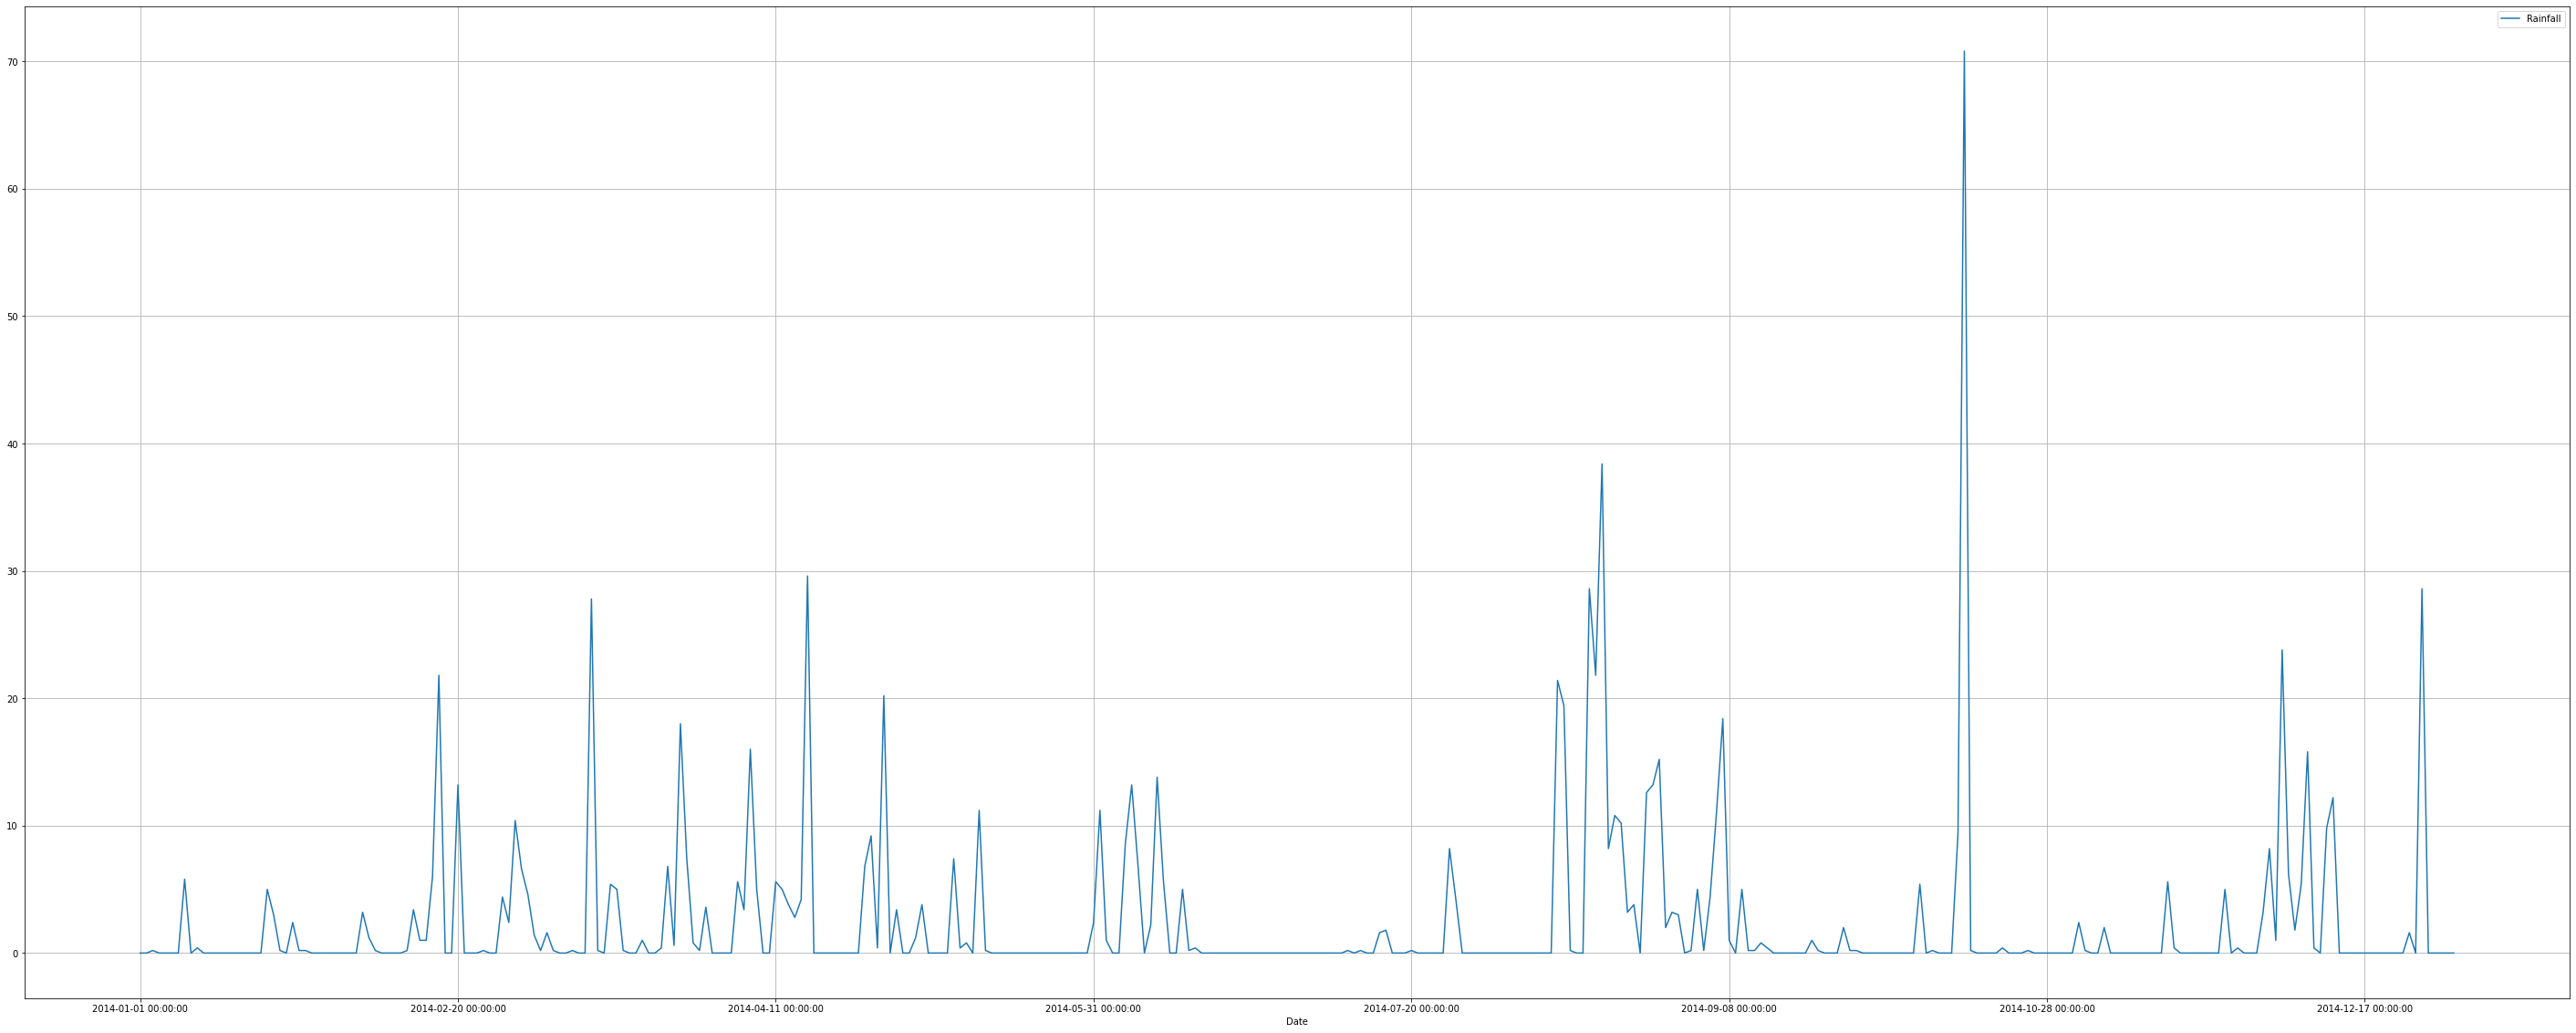

In [26]:
plt.figure(figsize=(50,20))
ax = plt.gca()
df_2014.plot(kind='line',x='Date',y='Rainfall',ax=ax)
plt.grid()
plt.show()

In [11]:
M1 = df_2014['Rainfall'].mean()
M1

2.458082191780822

In [12]:
n1 = len(df_2014['Rainfall'])
n1

365

In [13]:
S1 = np.sqrt(np.sum((df_2014['Rainfall'] - M1)**2) / (n1 - 1))
S1

6.4467660896921

In [14]:
t1 = (M1 - M_x) / S1
t1

0.22617265331096578

In [15]:
print(t1 > t_kr)

False


### Проверим данные за 2015 год

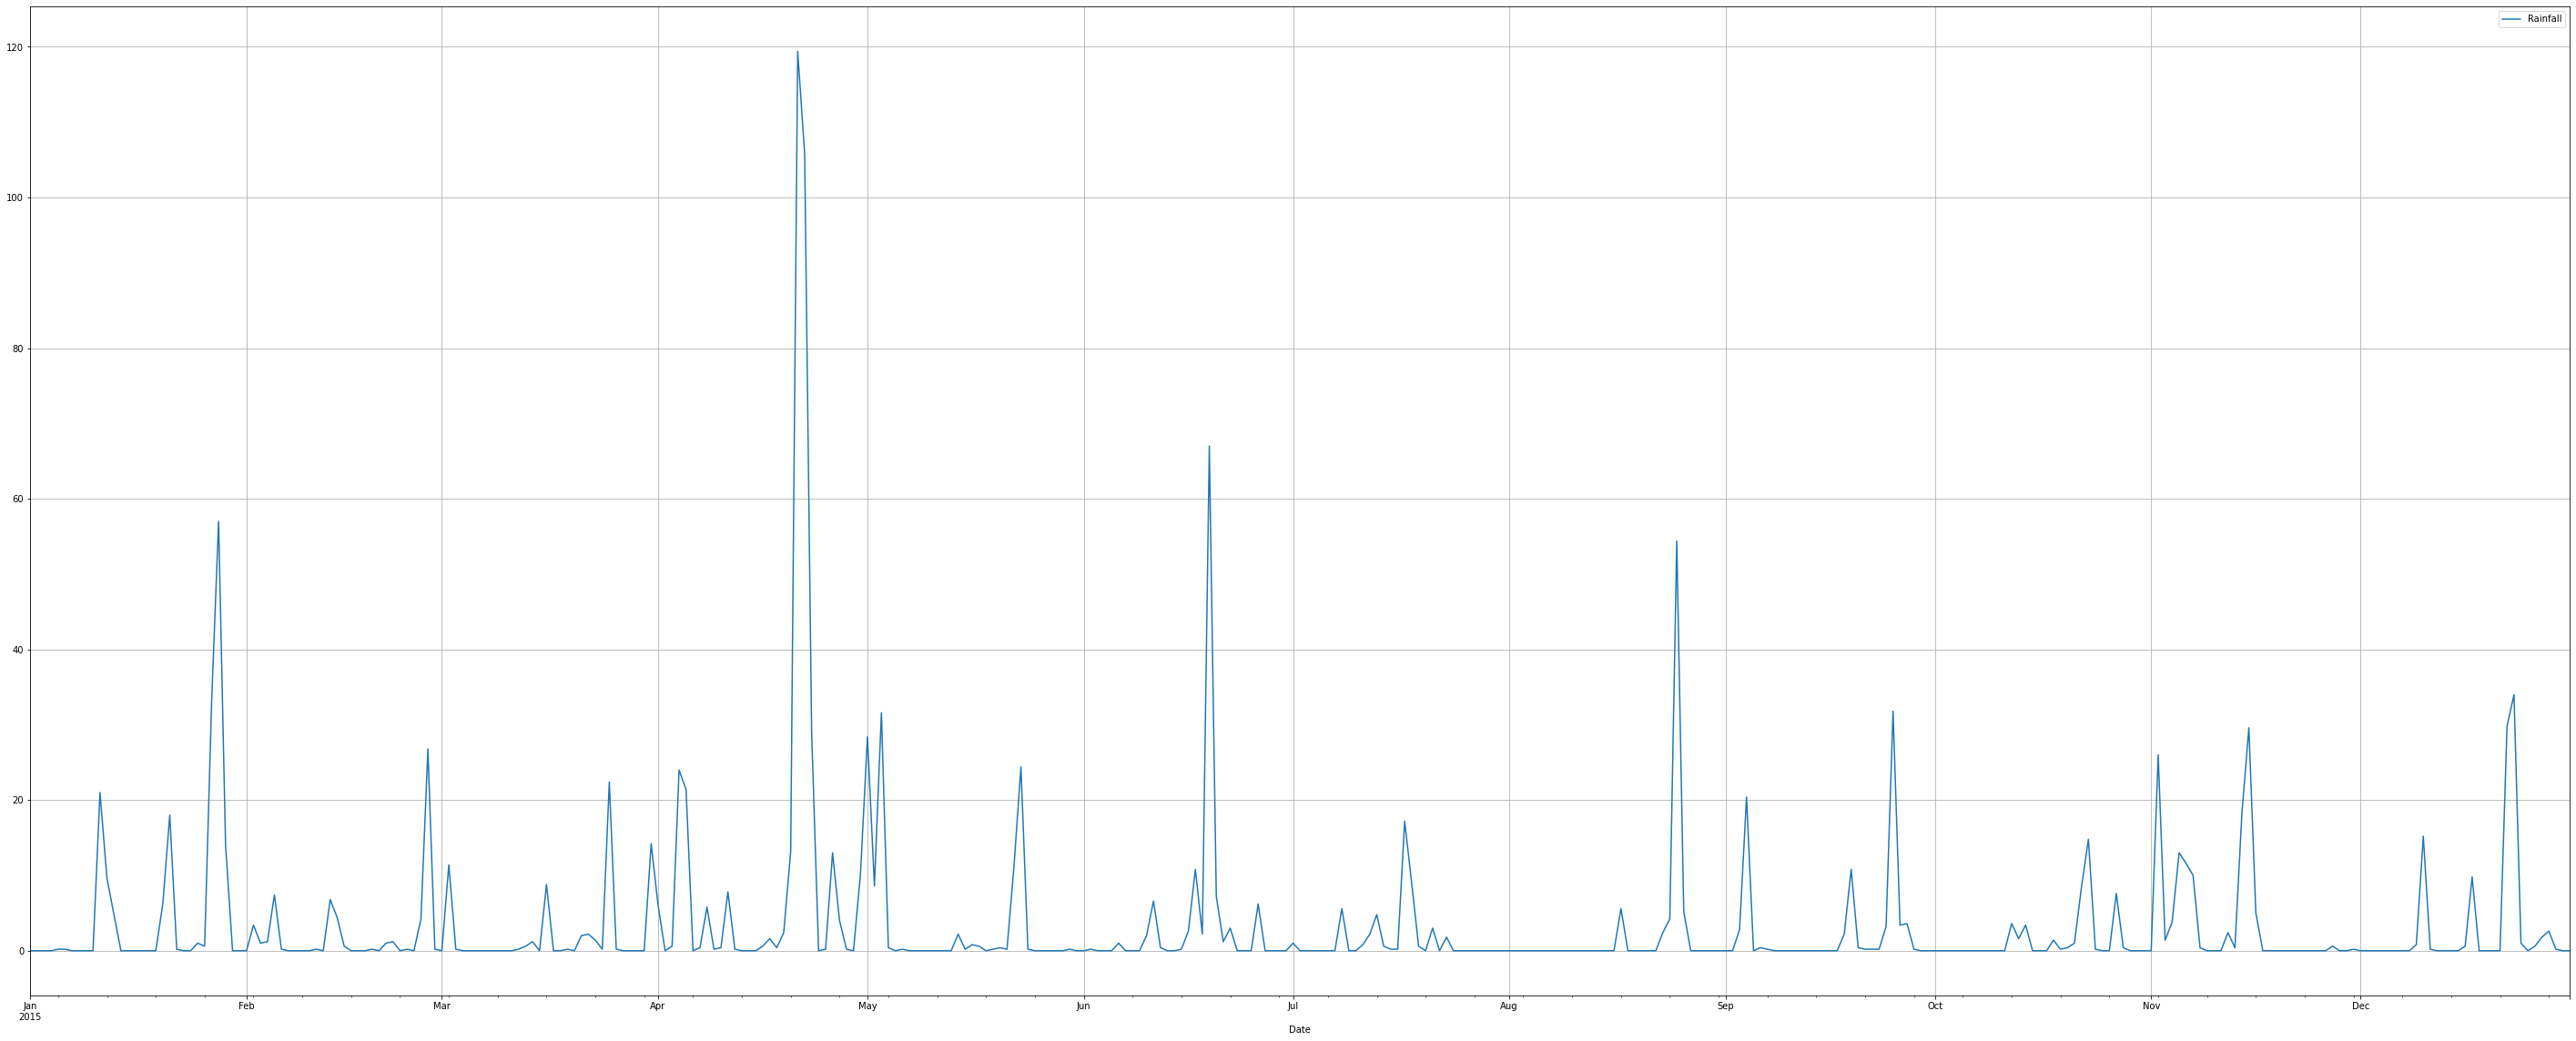

In [27]:
plt.figure(figsize=(50,20))
ax = plt.gca()
df_2015.plot(kind='line',x='Date',y='Rainfall',ax=ax)
plt.grid()
plt.show()

In [16]:
M2 = df_2015['Rainfall'].mean()
M2

3.666301369863014

In [17]:
n2 = len(df_2015['Rainfall'])
n2

365

In [18]:
S2 = np.sqrt(np.sum((df_2015['Rainfall'] - M2)**2) / (n2 - 1))
S2

11.462585518854748

In [19]:
t2 = (M2 - M_x) / S2
t2

0.23260907109283752

In [20]:
print(t2 > t_kr)

False


### Проверим данные за 2016 год

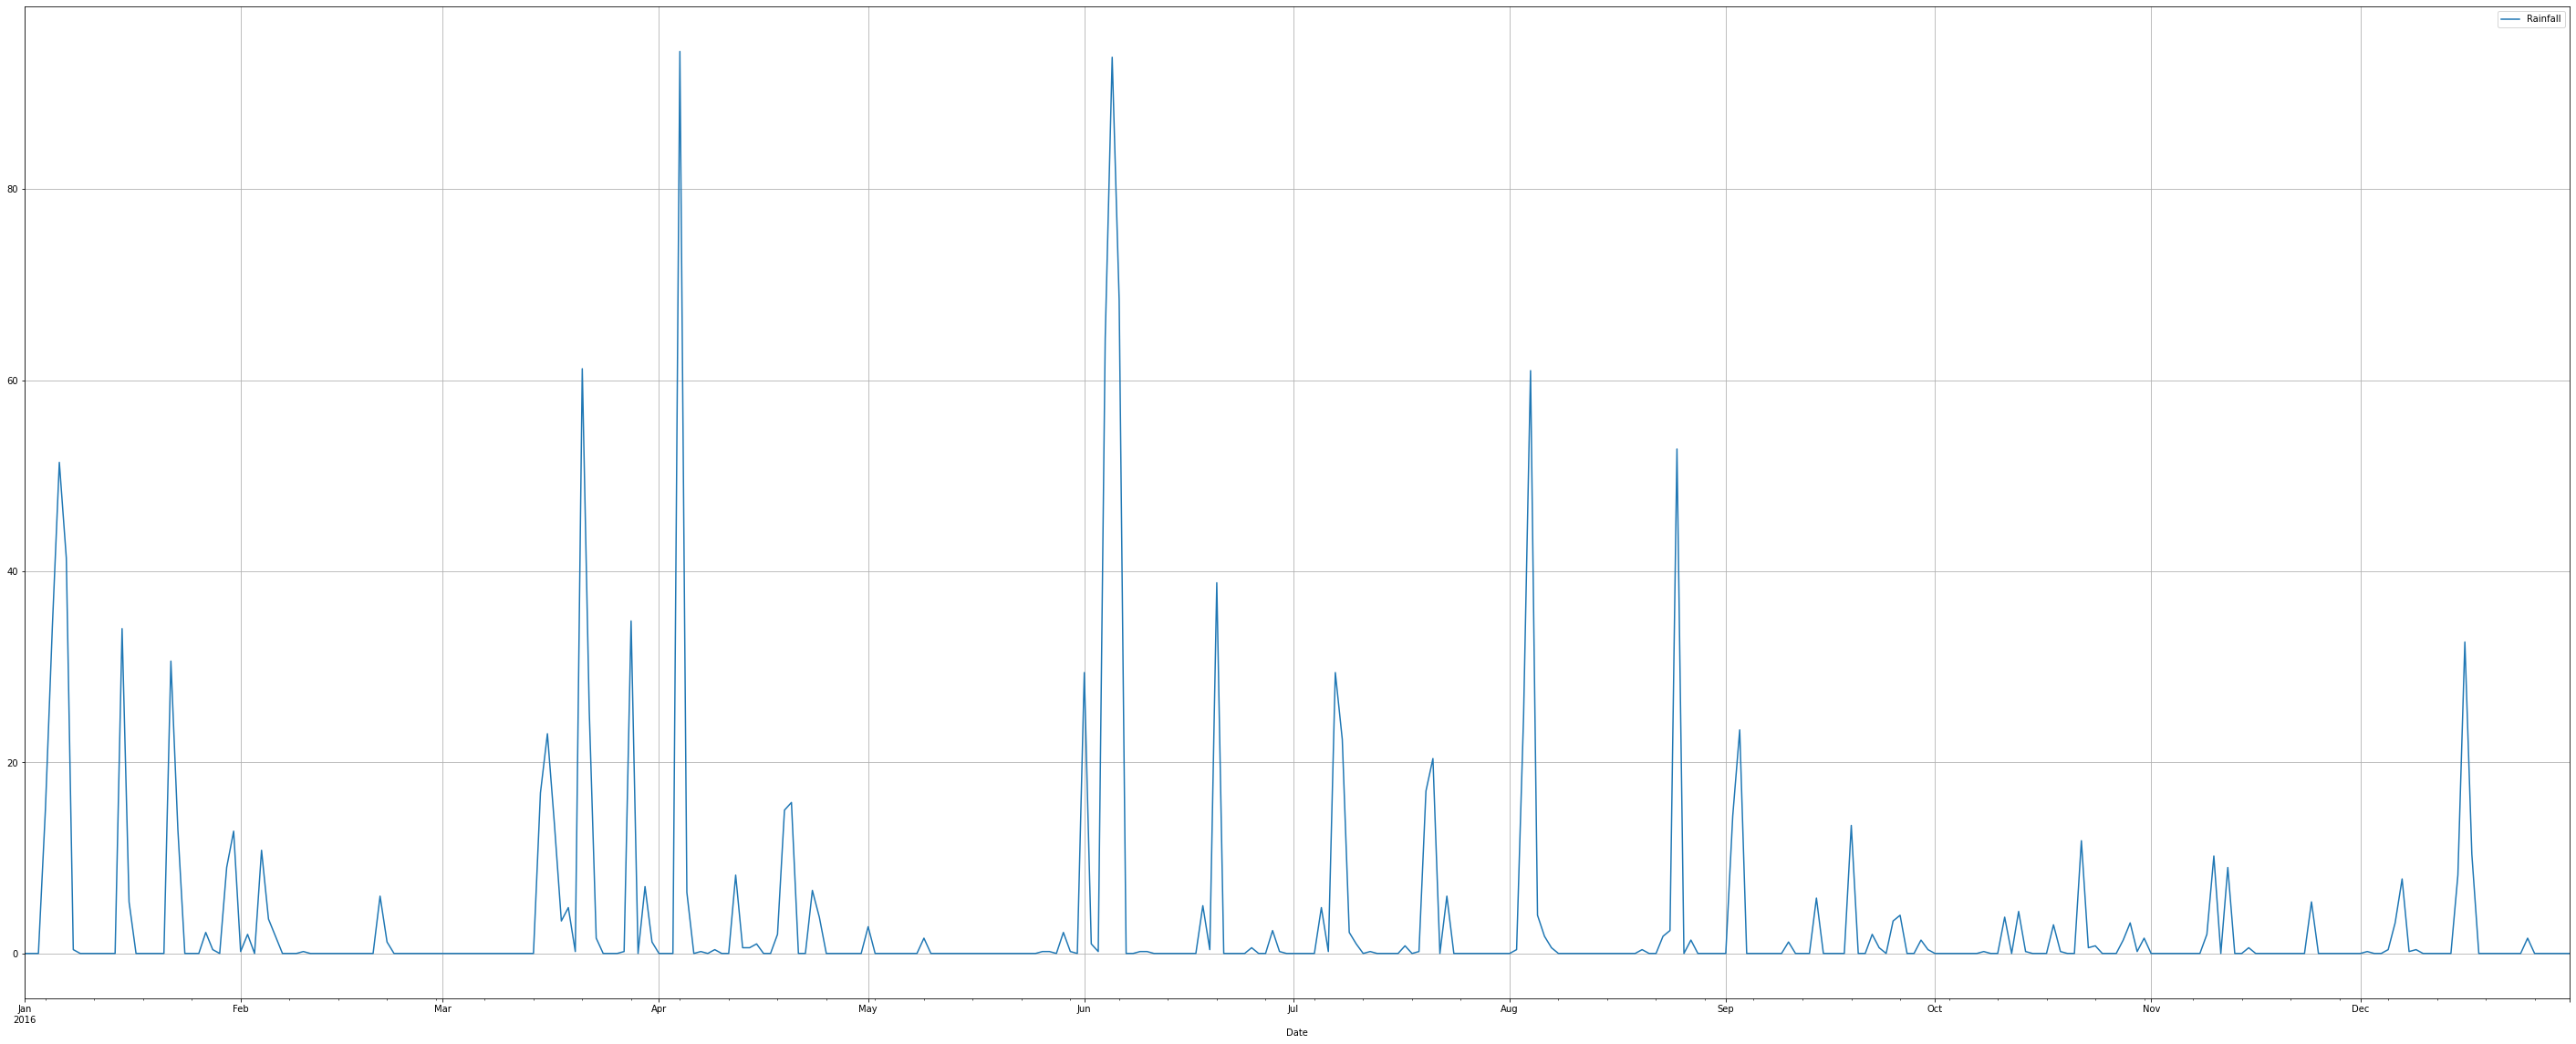

In [28]:
plt.figure(figsize=(50,20))
ax = plt.gca()
df_2016.plot(kind='line',x='Date',y='Rainfall',ax=ax)
plt.grid()
plt.show()

In [21]:
M3 = df_2016['Rainfall'].mean()
M3

3.785792349726776

In [22]:
n3 = len(df_2016['Rainfall'])
n3

366

In [23]:
S3 = np.sqrt(np.sum((df_2016['Rainfall'] - M3)**2) / (n3 - 1))
S3

11.881774476606077

In [24]:
t3 = (M3 - M_x) / S3
t3

0.23445928511870834

In [25]:
print(t3 > t_kr)

False


### Следовательно, в Австралии в году дождливых дней меньше, чем ясных.